In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
from bugless import *
from nltk.tokenize import sent_tokenize, word_tokenize
import gudhi
import matplotlib.pyplot as plt

## On data

I chose discoursive essays. Maybe essays with higher grades have more complex structure and thus have more holes in their homology.

In [2]:
pairs = essays("training_set_rel3.tsv")

In [3]:
print(pairs[3])

(4, "In @DATE1's world, there are many things found offensive.  Everyone has their own opinion on what is offensive and what is not. Many parents are becoming upset because they think their children are viewing things that they should not.  Other people are upset because they think the libraries are offending their culture or way of life.  This is even taken to the extreme where people want censhorship on libraries to avoid this, which is wrong.     Some people are becoming concerned about the materials in libraries.  They find these things to be offensive.  Everyone is entitled to their own opinion, but there really is nothing anyone can do if someone is offended.  The world is a public place and everywhere we go, something might be found offensive.  The library is a place for study.  It is never intended to offend someone, or bring bad to the world.  It is simply a place to inform, and if someone is offended by what they see, they should stay away from the library.     I have been to

In [4]:
sent_tokenize(pairs[3][1])

["In @DATE1's world, there are many things found offensive.",
 'Everyone has their own opinion on what is offensive and what is not.',
 'Many parents are becoming upset because they think their children are viewing things that they should not.',
 'Other people are upset because they think the libraries are offending their culture or way of life.',
 'This is even taken to the extreme where people want censhorship on libraries to avoid this, which is wrong.',
 'Some people are becoming concerned about the materials in libraries.',
 'They find these things to be offensive.',
 'Everyone is entitled to their own opinion, but there really is nothing anyone can do if someone is offended.',
 'The world is a public place and everywhere we go, something might be found offensive.',
 'The library is a place for study.',
 'It is never intended to offend someone, or bring bad to the world.',
 'It is simply a place to inform, and if someone is offended by what they see, they should stay away from the

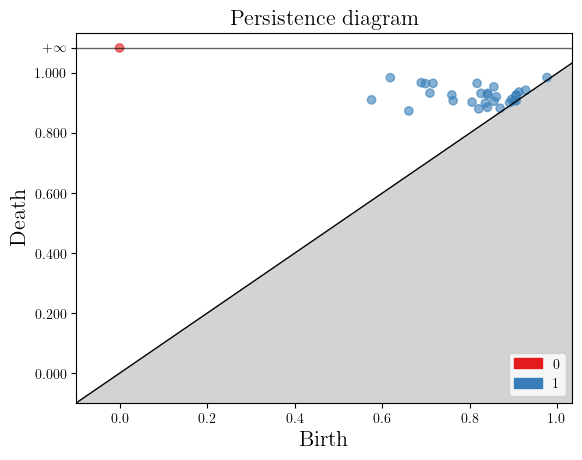

[(1, (0.6185313336814757, 0.9846550758793758)),
 (1, (0.5755927895296349, 0.9108517793892024)),
 (1, (0.6891559566693364, 0.968105540686933)),
 (1, (0.6986457714421133, 0.9650157588952055)),
 (1, (0.7160471584501985, 0.9659144363195398)),
 (1, (0.7089954026201228, 0.9334985308138848)),
 (1, (0.6608224850333209, 0.8739814840239584)),
 (1, (0.759002170605407, 0.9272482423441389)),
 (1, (0.8167570131372475, 0.9659144363195398)),
 (1, (0.762071240803631, 0.9079744135674761)),
 (1, (0.8256547284511431, 0.9324467370656934)),
 (1, (0.8549743156776777, 0.954072907647763)),
 (1, (0.8052957597670691, 0.9030737519080809)),
 (1, (0.8410889694230552, 0.9325392343956157)),
 (1, (0.8406331739984133, 0.9284779257056841)),
 (1, (0.8356325505034383, 0.900102889802326)),
 (1, (0.8606677729573838, 0.92102797200926)),
 (1, (0.8205186007456108, 0.880847822379629)),
 (1, (0.8553057986907713, 0.9061002325431241)),
 (1, (0.8404333875371662, 0.8858773026669198)),
 (1, (0.9126607369813535, 0.9369605714734776)),


In [5]:
essay_homology(pairs[3][1], visual = True)

In [6]:
notes_d1 = []
for i in range(len(pairs)):
    notes_d1.append((pairs[i][0], cnt_barcodes(essay_homology(pairs[i][1]), 1)))

In [7]:
cnt = [0]*13
sm = [0]*13
for p in notes_d1:
  cnt[p[0]] += 1
  sm[p[0]] += p[1]
for i in range(13):
  print(i, sm[i]/cnt[i] if cnt[i] > 0 else -1)


0 -1
1 0.8333333333333334
2 3.7777777777777777
3 11.857142857142858
4 22.308483290488432
5 34.42666666666667
6 50.857142857142854
7 -1
8 -1
9 -1
10 -1
11 -1
12 -1


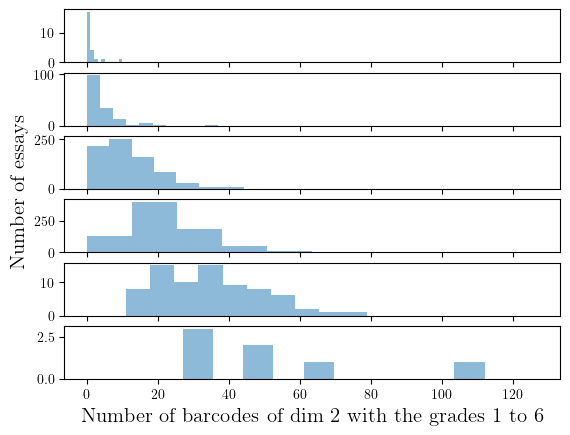

In [8]:
def myshow():
    global notes_d1
    y_values = set([p[0] for p in notes_d1])  # Get unique y values

    num_subplots = len(y_values)
    fig, axs = plt.subplots(num_subplots, 1, sharex=True)

    for i, y in enumerate(y_values):
        filtered_points = [p[1] for p in notes_d1 if p[0] == y]
        axs[i].hist(filtered_points, alpha=0.5)

    plt.xlabel('Number of barcodes of dim 2 with the grades 1 to 6', fontsize=15)
    fig.text(0.04, 0.5, 'Number of essays', va='center', rotation='vertical', fontsize=15)

    plt.show()


myshow()

## But length gives more holes, let's show that this does not change the conclusion

In [9]:
notes_ad1 = [(pairs[i][0], notes_d1[i][1]/len(sent_tokenize(pairs[i][1])))
             for i in range(len(pairs))]


In [10]:
print(notes_ad1)

[(4, 0.631578947368421), (1, 0.0), (2, 0.5333333333333333), (4, 0.967741935483871), (4, 1.2), (4, 0.88), (5, 0.72), (2, 1.0277777777777777), (4, 0.5789473684210527), (4, 1.0), (3, 0.5882352941176471), (3, 0.6666666666666666), (5, 0.8620689655172413), (3, 0.5), (3, 0.2), (3, 0.8823529411764706), (4, 1.0), (3, 0.46153846153846156), (1, 0.0), (3, 0.7142857142857143), (3, 0.2727272727272727), (3, 0.631578947368421), (3, 0.3333333333333333), (4, 0.7391304347826086), (3, 0.7727272727272727), (4, 0.7777777777777778), (4, 0.2727272727272727), (2, 0.0), (3, 0.6), (3, 0.65), (4, 0.7631578947368421), (3, 0.5625), (3, 0.25), (4, 0.8260869565217391), (3, 0.6363636363636364), (4, 0.8888888888888888), (4, 0.7142857142857143), (3, 1.0), (3, 0.5555555555555556), (4, 0.8695652173913043), (3, 0.5238095238095238), (4, 0.6666666666666666), (4, 1.0227272727272727), (4, 0.9629629629629629), (4, 0.75), (4, 0.625), (4, 1.064516129032258), (3, 0.5555555555555556), (4, 0.8), (3, 0.5), (5, 1.1333333333333333), (3

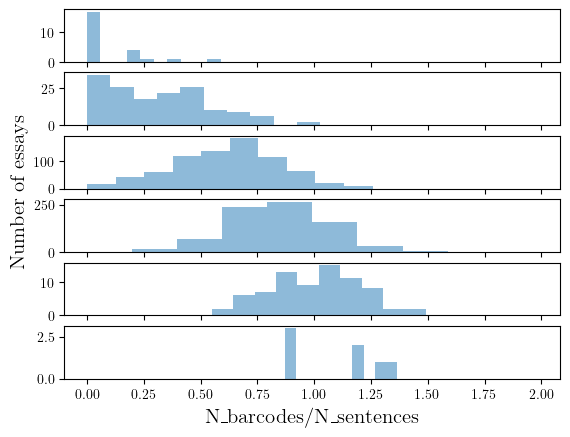

In [11]:
def myshow():
    global notes_ad1
    y_values = set([p[0] for p in notes_ad1])  # Get unique y values

    num_subplots = len(y_values)
    fig, axs = plt.subplots(num_subplots, 1, sharex=True)

    for i, y in enumerate(y_values):
        filtered_points = [p[1] for p in notes_ad1 if p[0] == y]
        axs[i].hist(filtered_points, alpha=0.5)

    plt.xlabel('N_barcodes/N_sentences', fontsize=15)
    fig.text(0.04, 0.5, 'Number of essays', va='center', rotation='vertical', fontsize=15)

    plt.show()
myshow()

In [12]:
notes_ad1 = [(pairs[i][0], notes_d1[i][1]/len(pairs[i][1].split()))
             for i in range(len(pairs))]

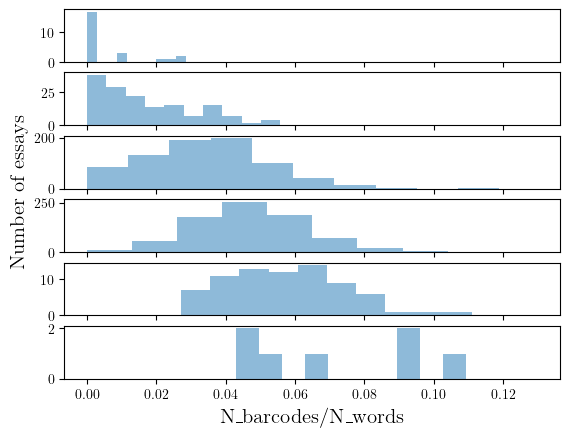

In [13]:
def myshow():
    global notes_ad1
    y_values = set([p[0] for p in notes_ad1])  # Get unique y values

    num_subplots = len(y_values)
    fig, axs = plt.subplots(num_subplots, 1, sharex=True)

    for i, y in enumerate(y_values):
        filtered_points = [p[1] for p in notes_ad1 if p[0] == y]
        axs[i].hist(filtered_points, alpha=0.5)

    plt.xlabel('N_barcodes/N_words', fontsize=15)
    fig.text(0.04, 0.5, 'Number of essays', va='center', rotation='vertical', fontsize=15)

    plt.show()
myshow()

In [14]:
cnt = [0]*13
sm = [0]*13
for i in range(len(notes_d1)):
  if 25 <= len(sent_tokenize(pairs[i][1])) <= 30:
    p = notes_d1[i]
    cnt[p[0]] += 1
    sm[p[0]] += p[1]
for i in range(13):
  print(i, sm[i]/cnt[i] if cnt[i] > 0 else -1, cnt[i])

0 -1 0
1 -1 0
2 20.0 1
3 23.742857142857144 70
4 24.78894472361809 199
5 26.0 19
6 -1 0
7 -1 0
8 -1 0
9 -1 0
10 -1 0
11 -1 0
12 -1 0


In [15]:
cnt = [0]*13
sm = [0]*13
for i in range(len(notes_d1)):
  if 30 <= len(sent_tokenize(pairs[i][1])) <= 35:
    p = notes_d1[i]
    cnt[p[0]] += 1
    sm[p[0]] += p[1]
for i in range(13):
  print(i, sm[i]/cnt[i] if cnt[i] > 0 else -1, cnt[i])

0 -1 0
1 -1 0
2 -1 0
3 30.75 28
4 32.0 114
5 33.0625 16
6 28.333333333333332 3
7 -1 0
8 -1 0
9 -1 0
10 -1 0
11 -1 0
12 -1 0


In [16]:
cnt = [0]*13
sm = [0]*13
for i in range(len(notes_d1)):
  if 40 <= len(sent_tokenize(pairs[i][1])) <= 45:
    p = notes_d1[i]
    cnt[p[0]] += 1
    sm[p[0]] += p[1]
for i in range(13):
  print(i, sm[i]/cnt[i] if cnt[i] > 0 else -1, cnt[i])

0 -1 0
1 -1 0
2 -1 0
3 40.0 4
4 45.96666666666667 30
5 49.45454545454545 11
6 52.0 1
7 -1 0
8 -1 0
9 -1 0
10 -1 0
11 -1 0
12 -1 0


In [17]:
cnt = [0]*13
sm = [0]*13
for i in range(len(notes_d1)):
  if 50 <= len(sent_tokenize(pairs[i][1])) <= 55:
    p = notes_d1[i]
    cnt[p[0]] += 1
    sm[p[0]] += p[1]
for i in range(13):
  print(i, sm[i]/cnt[i] if cnt[i] > 0 else -1, cnt[i])

0 -1 0
1 -1 0
2 -1 0
3 63.0 1
4 50.0 1
5 79.0 1
6 -1 0
7 -1 0
8 -1 0
9 -1 0
10 -1 0
11 -1 0
12 -1 0


In [18]:
cnt = [0]*13
sm = [0]*13
for i in range(len(notes_d1)):
  if 20 <= len(sent_tokenize(pairs[i][1])) <= 25:
    p = notes_d1[i]
    cnt[p[0]] += 1
    sm[p[0]] += p[1]
for i in range(13):
  print(i, sm[i]/cnt[i] if cnt[i] > 0 else -1, cnt[i])

0 -1 0
1 -1 0
2 14.666666666666666 3
3 17.329032258064515 155
4 18.3886925795053 283
5 17.923076923076923 13
6 -1 0
7 -1 0
8 -1 0
9 -1 0
10 -1 0
11 -1 0
12 -1 0


In [19]:
def print_ah1_within_words_range(l, r):
  cnt = [0]*13
  sm = [0]*13
  for i in range(len(notes_d1)):
    if l <= len(pairs[i][1].split()) <= r:
      p = notes_d1[i]
      cnt[p[0]] += 1
      sm[p[0]] += p[1]
  for i in range(13):
    print(i, sm[i]/cnt[i] if cnt[i] > 0 else -1, cnt[i])

In [22]:
print_ah1_within_words_range(100, 110)

0 -1 0
1 1.0 1
2 1.0 5
3 0.0 1
4 -1 0
5 -1 0
6 -1 0
7 -1 0
8 -1 0
9 -1 0
10 -1 0
11 -1 0
12 -1 0


In [20]:
print_ah1_within_words_range(200, 210)

0 -1 0
1 -1 0
2 1.4 5
3 6.25 20
4 15.0 1
5 -1 0
6 -1 0
7 -1 0
8 -1 0
9 -1 0
10 -1 0
11 -1 0
12 -1 0


In [21]:
print_ah1_within_words_range(300, 310)

0 -1 0
1 -1 0
2 5.5 4
3 10.891891891891891 37
4 12.047619047619047 21
5 -1 0
6 -1 0
7 -1 0
8 -1 0
9 -1 0
10 -1 0
11 -1 0
12 -1 0


In [23]:
print_ah1_within_words_range(400, 410)

0 -1 0
1 10.0 1
2 11.0 2
3 15.0 22
4 17.21212121212121 33
5 11.0 1
6 -1 0
7 -1 0
8 -1 0
9 -1 0
10 -1 0
11 -1 0
12 -1 0


In [24]:
print_ah1_within_words_range(500, 510)

0 -1 0
1 -1 0
2 -1 0
3 20.666666666666668 3
4 25.95 20
5 27.5 2
6 46.0 1
7 -1 0
8 -1 0
9 -1 0
10 -1 0
11 -1 0
12 -1 0


In [29]:
print_ah1_within_words_range(600, 610)

0 -1 0
1 -1 0
2 -1 0
3 35.5 2
4 30.0 9
5 31.2 5
6 -1 0
7 -1 0
8 -1 0
9 -1 0
10 -1 0
11 -1 0
12 -1 0


In [34]:
for i in range(len(notes_d1)):
    if 600 <= len(pairs[i][1].split()) <= 610 and pairs[i][0] == 3:
      print(i)

1008
1347


In [32]:
print(pairs[1008][1])
print(pairs[1347][1])

What is the extent of reading that should be read by the public world? There are so many different types of reading and music that many people enjoy as a hobby. Books have been around for centuries and can create a whole new world for readers. The latest gossip can be found in many magazines. Music is sometimes said to help people cope with life problems. Movies can open up peoples' imaginations and make them feel emotions for a theme of no importance. All these things make up peoples lives. Without any of these enjoyments what would people do with their free time? Books, magazines, music, and movies should not be taken off shelves. They're huge factors that make up the society and make life what it is.          Books and magazines are two fun things people love to read. Fiction or nonfiction? No matter if books are real or fake they create stories that interest people. Reading is a hobby that's been around since the beginning of times. There are many different selections in reading, f

In [35]:
for i in range(len(notes_d1)):
    if 600 <= len(pairs[i][1].split()) <= 610 and pairs[i][0] == 5:
      print(i)

745
884
930
1163
1373


In [36]:
print(pairs[745][1])

Newspaper staff and/or whom it @MONTH1 concern,      Reading material found in a library is very useful and informative to the world, there is no limit to what could be found on paper. Whether it be offensive or not, having limits to books will only create tension, effect the economy, and will lead to illegal activity, ironically enough, in which offensive books will be written and sold, completely undercover.      In today's world, it would be nearly impossible to pick up a book and factually state that it is not offensive. Almost everyone has some little issue with something in the world today, and because of that, original and unoffensive material are hard to come by. With the stripping of offensive material from libraries, authors will be devastated, not just emotionally, but will be out of a job and will have less income. Because of how virtually impossible it is to write a book that is not offensive, authors will become very frustrated, and most are very passionate about what the

## Conclusion

Persistent homology is a good tool to analyse the structure of a dataset in an unsupervised way. Moreover it considers all the scale.